<a href="https://colab.research.google.com/github/methrex/COT5600/blob/master/hw_2/COT5600_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as p
from numpy import outer,matmul
from numpy import kron as tensor
from math  import sqrt,cos,sin,pi

#define and assign global variables
global ket0, ket1
global ket00, ket01, ket10, ket11
global plus, minus

ket0=np.array([1,0])
ket1=np.array([0,1])
ket00=tensor(ket0,ket0)
ket01=tensor(ket0,ket1)
ket10=tensor(ket1,ket0)
ket11=tensor(ket1,ket1)
plus=np.array([1,1])/sqrt(2)
minus=np.array([1,-1])/sqrt(2)

In [0]:
def hadamard(control,register,U,phi):
  In=np.identity(len(register))
  H=np.transpose([plus,minus])
  H=tensor(H,In)

  #build U, build state vector
  U=tensor(outer(ket0,ket0),In)+tensor(outer(ket1,ket1),U) 
  state=tensor(control,register)

  #apply gates
  state=matmul(H,state)
  state=matmul(U,state)
  state=matmul(H,state)
  #initialize projector, get Prob(0)
  P=tensor(outer(ket0,ket0),In)
  prob=np.linalg.norm(matmul(P,state),ord=2)**2

  return prob

**Problem 1**
---

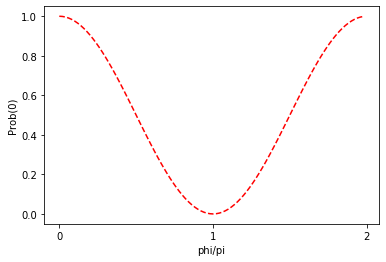

In [3]:
phi=np.arange(0,1,0.01)
phi=np.multiply(phi,2*pi)
prob=[]
for k in range(len(phi)):
  U=np.array([[cos(phi[k]),sin(phi[k])],[-sin(phi[k]),cos(phi[k])]])
  prob.append(hadamard(ket0,ket0,U,phi[k]))
p.plot(phi,prob,'r--')
p.ylabel('Prob(0)')
p.xlabel('phi/pi')
p.xticks(np.arange(0,3*pi,pi),('0','1','2'))
p.show()

**Problem 2**
---

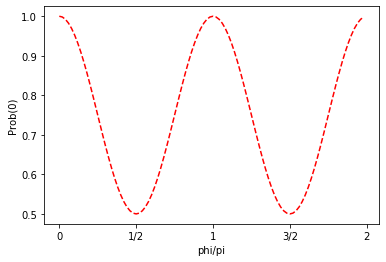

In [4]:
S=outer(ket00,ket00)+outer(ket01,ket10)+outer(ket10,ket01)+outer(ket11,ket11)

phi=np.arange(0,1,0.01)
phi=np.multiply(phi,2*pi)
prob=[]
for k in range(len(phi)):
  psi=tensor(ket0, np.multiply(cos(phi[k]),ket0)+np.multiply(sin(phi[k]),ket1))
  prob.append(hadamard(ket0,psi,S,phi[k]))
p.plot(phi,prob,'r--')
p.ylabel('Prob(0)')
p.xlabel('phi/pi')
p.xticks(np.arange(0,2.5*pi,0.5*pi),('0','1/2','1','3/2','2'))
p.show() 